# Tratamiento de datos 2017

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#NHCCPCTRL2

In [10]:
"""
DIRECTORIO: identificación de la vivienda -- 
DIRECTORIO_HOG: identificación del hogar
DIRECTORIO_PER: identificación de la persona  
NHCCPCTRL2: 16. ¿Cuántas personas componen este hogar? 
NHCCP19: Incluyendo sala y comedor, ¿de cuántos cuartos o piezas dispone este hogar? (excluya cocina, baños, garajes y los cuartos destinados a negocio)
NHCCP20: 18. ¿En cuántos de esos cuartos duermen las personas del hogar?
NHCCP35A: ¿Cuantos cuartos?
CODLOCALIDAD: localidad
NHCCP21A: 19. Durante el día, cuáles de los siguientes espacios cuentan con iluminación natural: 1. Sala - comedor
NHCCP21B: 19. Durante el día, cuáles de los siguientes espacios cuentan con iluminación natural: 2. Cuartos para dormir
NPCFP14I: 15. le han diagnosticado alguna de estas enfermedades o problemas de salud: 9. Asma?
1: Si
2: No
"""



features_2017 = ['DIRECTORIO', 'DIRECTORIO_HOG', 'DIRECTORIO_PER', 'NHCCPCTRL2', 'NHCCP19', 
                 'NHCCP20', 'NHCCP35A', 'CODLOCALIDAD', 'NHCCP21A', 'NHCCP21B', 'NPCFP14I']

In [ ]:
no_asma_2017_df = pd.read_csv('./data/data_sin_asma/Datos_proyecto_II_BI_2017_sin_asma.csv', encoding="utf-8", sep = ',')

In [ ]:
asma_2017_df = pd.read_csv('./data/data_asma/Datos_proyecto_II_BI_2017.csv', encoding="utf-8", sep = ',')

C:\Users\Esteban\AppData\Local\Temp\ipykernel_1516\1698132705.py:1: DtypeWarning: Columns (145,295,297,380,381,383,469,495,496,499,500,501,508,509,510,511) have mixed types. Specify dtype option on import or set low_memory=False.
  asma_2017_df = pd.read_csv('./data/data_asma/Datos_proyecto_II_BI_2017.csv', encoding="utf-8", sep = ',')


In [ ]:
no_asma_2017_df.shape, asma_2017_df.shape 

((315225, 552), (4727, 552))

In [ ]:
asma_2017_df[features_2017].head(10)

,DIRECTORIO,DIRECTORIO_HOG,DIRECTORIO_PER,NHCCPCTRL2,NHCCP19,NHCCP20,NHCCP35A,CODLOCALIDAD,NHCCP21A,NHCCP21B,NPCFP14I
0,101033,1010331,10103311,1,4,1,2.0,11.0,1,1,1
1,101041,1010411,10104112,3,1,1,1.0,1.0,2,2,1
2,101042,1010421,10104213,5,4,3,1.0,1.0,1,1,1
3,101047,1010471,10104713,3,3,3,1.0,1.0,3,1,1
4,101059,1010591,10105914,5,4,4,2.0,11.0,1,1,1
5,101059,1010591,10105915,5,4,4,2.0,11.0,1,1,1
6,101063,1010631,10106311,3,5,3,1.0,11.0,1,1,1
7,101089,1010891,10108911,4,4,3,2.0,11.0,1,1,1
8,101089,1010891,10108914,4,4,3,2.0,11.0,1,1,1
9,101142,1011422,10114221,3,2,1,1.0,13.0,1,1,1


In [ ]:
duplicados = asma_2017_df[features_2017].duplicated(subset=['DIRECTORIO_HOG'])
numero_duplicados = duplicados.sum()

duplicados = asma_2017_df[features_2017].duplicated(subset=['DIRECTORIO'])
numero_duplicados = duplicados.sum()

print("El número de filas duplicadas DIRECTORIO_HOG es:", numero_duplicados)

print("El número de filas duplicadas es:", numero_duplicados)



El número de filas duplicadas DIRECTORIO_HOG es: 414
El número de filas duplicadas es: 414


In [ ]:
duplicados = no_asma_2017_df[features_2017].duplicated(subset=['DIRECTORIO_PER'])
numero_duplicados = duplicados.sum()
print("El número de filas duplicadas es:", numero_duplicados)

El número de filas duplicadas es: 0


In [ ]:
#UNIR DATASET
# Método 1: Usar append()
provisional = pd.concat([asma_2017_df, no_asma_2017_df], ignore_index=True)



In [ ]:
provisional[features_2017].head(10)

,DIRECTORIO,DIRECTORIO_HOG,DIRECTORIO_PER,NHCCPCTRL2,NHCCP19,NHCCP20,NHCCP35A,CODLOCALIDAD,NHCCP21A,NHCCP21B,NPCFP14I
0,101033,1010331,10103311,1,4,1,2.0,11.0,1,1,1
1,101041,1010411,10104112,3,1,1,1.0,1.0,2,2,1
2,101042,1010421,10104213,5,4,3,1.0,1.0,1,1,1
3,101047,1010471,10104713,3,3,3,1.0,1.0,3,1,1
4,101059,1010591,10105914,5,4,4,2.0,11.0,1,1,1
5,101059,1010591,10105915,5,4,4,2.0,11.0,1,1,1
6,101063,1010631,10106311,3,5,3,1.0,11.0,1,1,1
7,101089,1010891,10108911,4,4,3,2.0,11.0,1,1,1
8,101089,1010891,10108914,4,4,3,2.0,11.0,1,1,1
9,101142,1011422,10114221,3,2,1,1.0,13.0,1,1,1


In [ ]:
provisional['year'] = 2017

C:\Users\Esteban\AppData\Local\Temp\ipykernel_1516\1933145409.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  provisional['year'] = 2017


In [ ]:
features_2017.append('year')

In [ ]:
provisional[features_2017].head(10)

,DIRECTORIO,DIRECTORIO_HOG,DIRECTORIO_PER,NHCCPCTRL2,NHCCP19,NHCCP20,NHCCP35A,CODLOCALIDAD,NHCCP21A,NHCCP21B,NPCFP14I,year
0,101033,1010331,10103311,1,4,1,2.0,11.0,1,1,1,2017
1,101041,1010411,10104112,3,1,1,1.0,1.0,2,2,1,2017
2,101042,1010421,10104213,5,4,3,1.0,1.0,1,1,1,2017
3,101047,1010471,10104713,3,3,3,1.0,1.0,3,1,1,2017
4,101059,1010591,10105914,5,4,4,2.0,11.0,1,1,1,2017
5,101059,1010591,10105915,5,4,4,2.0,11.0,1,1,1,2017
6,101063,1010631,10106311,3,5,3,1.0,11.0,1,1,1,2017
7,101089,1010891,10108911,4,4,3,2.0,11.0,1,1,1,2017
8,101089,1010891,10108914,4,4,3,2.0,11.0,1,1,1,2017
9,101142,1011422,10114221,3,2,1,1.0,13.0,1,1,1,2017


In [ ]:
provisional[features_2017].columns

Index(['DIRECTORIO', 'DIRECTORIO_HOG', 'DIRECTORIO_PER', 'NHCCPCTRL2',
       'NHCCP19', 'NHCCP20', 'NHCCP35A', 'CODLOCALIDAD', 'NHCCP21A',
       'NHCCP21B', 'NPCFP14I', 'year'],
      dtype='object')

In [ ]:
df_2017 = provisional[features_2017].copy()

In [ ]:
# Renombrar las columnas
nuevos_nombres = {'DIRECTORIO': 'id_vivienda', 'DIRECTORIO_HOG': 'id_hogar', 'DIRECTORIO_PER': 'id_persona', 
         'NHCCPCTRL2': 'num_personas_hogar', 'NHCCP19': 'num_cuartos_hogar', 'NHCCP20': 'num_cuartos_ocupados', 
         'NHCCP35A': 'num_cuartos', 'CODLOCALIDAD': 'localidad', 'NHCCP21A':'iluminacion_sala',  'NHCCP21B':'iluminacion_cuartos',
         'NPCFP14I': 'asma',          
                  }
df_2017 = df_2017.rename(columns=nuevos_nombres)

In [ ]:
(df_2017.isnull().sum() / df_2017.shape[0]).sort_values(ascending = False)

localidad               0.306743
num_cuartos             0.032986
id_vivienda             0.000000
id_hogar                0.000000
id_persona              0.000000
num_personas_hogar      0.000000
num_cuartos_hogar       0.000000
num_cuartos_ocupados    0.000000
iluminacion_sala        0.000000
iluminacion_cuartos     0.000000
asma                    0.000000
year                    0.000000
dtype: float64

In [ ]:
df_2017.describe()

,id_vivienda,id_hogar,id_persona,num_personas_hogar,num_cuartos_hogar,num_cuartos_ocupados,num_cuartos,localidad,iluminacion_sala,iluminacion_cuartos,asma,year
count,319952.000000,3.199520e+05,3.199520e+05,319952.000000,319952.000000,319952.000000,309398.000000,221809.000000,319952.000000,319952.000000,319952.000000,319952.0
mean,195527.604478,1.955277e+06,1.968230e+07,3.667050,3.652954,2.420813,1.421299,9.760312,1.139815,1.058221,1.985226,2017.0
std,58686.783373,5.868678e+05,7.563171e+06,1.592154,1.272738,0.966174,0.663760,5.108173,0.460414,0.234162,0.120648,0.0
min,101000.000000,1.010001e+06,1.010001e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2017.0
25%,145678.000000,1.456781e+06,1.457021e+07,3.000000,3.000000,2.000000,1.000000,6.000000,1.000000,1.000000,2.000000,2017.0
50%,181810.000000,1.818101e+06,1.818611e+07,4.000000,4.000000,2.000000,1.000000,9.000000,1.000000,1.000000,2.000000,2017.0
75%,248360.250000,2.483604e+06,2.485031e+07,4.000000,4.000000,3.000000,2.000000,13.000000,1.000000,1.000000,2.000000,2017.0
max,317885.000000,3.178851e+06,3.175431e+08,17.000000,15.000000,11.000000,10.000000,21.000000,3.000000,2.000000,2.000000,2017.0


In [ ]:
for value in df_2017:
  print() 
  print(df_2017[value].value_counts())
  print() 
  


id_vivienda
184980    22
145788    22
112379    21
135993    19
172991    19
          ..
164260     1
260939     1
164268     1
164276     1
101033     1
Name: count, Length: 107218, dtype: int64


id_hogar
1409051    17
1091071    14
1590861    14
1857011    14
1692321    14
           ..
1638881     1
2604411     1
1638931     1
1638951     1
1010331     1
Name: count, Length: 109111, dtype: int64


id_persona
10103311    1
23136314    1
23136512    1
23136511    1
23136414    1
           ..
15816523    1
15816522    1
15816521    1
15816515    1
31788512    1
Name: count, Length: 319952, dtype: int64


num_personas_hogar
4     86172
3     80508
2     55300
5     45010
1     18979
6     18726
7      8253
8      3696
9      1773
10      780
11      374
12      204
13      104
14       56
17       17
Name: count, dtype: int64


num_cuartos_hogar
4     107177
3      97632
5      44408
2      39581
6      13372
1      10619
7       4330
8       1740
9        525
10       339
11       

In [ ]:
df_2017['iluminacion_sala'] = df_2017['iluminacion_sala'].replace(3, 2)

In [ ]:
print(df_2017['iluminacion_sala'].value_counts())

iluminacion_sala
1    289890
2     30062
Name: count, dtype: int64


# Tratamiento datos 2021

In [ ]:
"""
DIRECTORIO: identificación de la vivienda
DIRECTORIO_HOG: identificación del hogar
DIRECTORIO_PER: identificación de la persona 
NHCCPCTRL2: 16. ¿Cuántas personas componen este hogar?
NHCCP19: Incluyendo sala y comedor, ¿de cuántos cuartos o piezas dispone este hogar? (excluya cocina, baños, garajes y los cuartos destinados a negocio)
NHCCP20: 18. ¿En cuántos de esos cuartos duermen las personas del hogar?
NHCCP35A: ¿Cuantos cuartos?
COD_LOCALIDAD: codigo de localidad

NHCCP21A: 19. Durante el día, cuáles de los siguientes espacios cuentan con iluminación natural: 1. Sala - comedor
NHCCP21B: 19. Durante el día, cuáles de los siguientes espacios cuentan con iluminación natural: 2. Cuartos para dormir

NPCFP14F: 15. ¿A ...le han diagnosticado alguna de estas enfermedades o problemas de salud: 6. Enfermedades respiratorias crónicas como: Asma, EPOC, Enfisema?
1: Si
2: No
"""

features_2021 = ['DIRECTORIO', 'DIRECTORIO_HOG','DIRECTORIO_PER', 
                 'NHCCPCTRL2', 'NHCCP19', 'NHCCP20', 'NHCCP35A', 
                 'COD_LOCALIDAD', 'NPCFP14F']

In [ ]:
no_asma_2021_df = pd.read_csv('./data/data_sin_asma/Datos_proyecto_II_BI_2021_sin_asma.csv', sep = ',', encoding='latin1')

C:\Users\Esteban\AppData\Local\Temp\ipykernel_1516\3873647657.py:1: DtypeWarning: Columns (8,10,334,408,409,410,412,538,540,541,543,545,549,552,553,554,555,556,557) have mixed types. Specify dtype option on import or set low_memory=False.
  no_asma_2021_df = pd.read_csv('./data/data_sin_asma/Datos_proyecto_II_BI_2021_sin_asma.csv', sep = ',', encoding='latin1')


In [ ]:
asma_2021_df = pd.read_csv('./data/data_asma/Datos_proyecto_II_BI_2021.csv', sep = ',', encoding='latin1')

C:\Users\Esteban\AppData\Local\Temp\ipykernel_1516\2157790421.py:1: DtypeWarning: Columns (334,410,412,540,541,543,545,549,552,553,554,555,556,557) have mixed types. Specify dtype option on import or set low_memory=False.
  asma_2021_df = pd.read_csv('./data/data_asma/Datos_proyecto_II_BI_2021.csv', sep = ',', encoding='latin1')


In [ ]:
no_asma_2021_df.shape, asma_2021_df.shape 

((283651, 596), (8630, 601))

In [ ]:
no_asma_2021_df[features_2021].head(10)

,DIRECTORIO,DIRECTORIO_HOG,DIRECTORIO_PER,NHCCPCTRL2,NHCCP19,NHCCP20,NHCCP35A,COD_LOCALIDAD,NPCFP14F
0,1000003.0,10000031,100000311,3,3,2,1.0,7.0,2
1,1000003.0,10000031,100000312,3,3,2,1.0,7.0,2
2,1000003.0,10000031,100000313,3,3,2,1.0,7.0,2
3,1000004.0,10000041,100000411,2,2,2,1.0,7.0,2
4,1000007.0,10000071,100000711,5,3,3,1.0,7.0,2
5,1000007.0,10000071,100000712,5,3,3,1.0,7.0,2
6,1000007.0,10000071,100000713,5,3,3,1.0,7.0,2
7,1000007.0,10000071,100000714,5,3,3,1.0,7.0,2
8,1000007.0,10000071,100000715,5,3,3,1.0,7.0,2
9,1000008.0,10000081,100000811,2,3,2,1.0,7.0,2


In [ ]:
asma_2021_df[features_2021].head(10)

,DIRECTORIO,DIRECTORIO_HOG,DIRECTORIO_PER,NHCCPCTRL2,NHCCP19,NHCCP20,NHCCP35A,COD_LOCALIDAD,NPCFP14F
0,1000001,10000011,100000111,1,4,1,2.0,7.0,1
1,1000004,10000041,100000412,2,2,2,1.0,7.0,1
2,1000033,10000331,100003313,4,4,3,1.0,5.0,1
3,1000040,10000401,100004011,2,3,2,2.0,9.0,1
4,1000041,10000411,100004111,3,3,2,1.0,9.0,1
5,1000055,10000551,100005516,6,5,4,1.0,4.0,1
6,1000062,10000621,100006211,2,5,2,1.0,4.0,1
7,1000090,10000901,100009011,3,4,2,1.0,11.0,1
8,1000093,10000931,100009312,3,4,2,1.0,11.0,1
9,1000093,10000931,100009313,3,4,2,1.0,11.0,1


In [ ]:
duplicados = no_asma_2021_df[features_2021].duplicated(subset=['DIRECTORIO_PER'])
numero_duplicados = duplicados.sum()
print("El número de filas duplicadas es:", numero_duplicados)

El número de filas duplicadas es: 0


In [ ]:
duplicados = asma_2021_df[features_2021].duplicated(subset=['DIRECTORIO_PER'])
numero_duplicados = duplicados.sum()
print("El número de filas duplicadas es:", numero_duplicados)

El número de filas duplicadas es: 0


In [ ]:
#UNIR DATASET
# Método 1: Usar append()
provisional1 = pd.concat([asma_2021_df, no_asma_2021_df], ignore_index=True)


In [ ]:
provisional1['year'] = 2021

C:\Users\Esteban\AppData\Local\Temp\ipykernel_1516\1221507135.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  provisional1['year'] = 2021


In [ ]:
features_2021.append('year')

In [ ]:
provisional1[features_2021].head(10)

,DIRECTORIO,DIRECTORIO_HOG,DIRECTORIO_PER,NHCCPCTRL2,NHCCP19,NHCCP20,NHCCP35A,COD_LOCALIDAD,NPCFP14F,year
0,1000001.0,10000011,100000111,1,4,1,2.0,7.0,1,2021
1,1000004.0,10000041,100000412,2,2,2,1.0,7.0,1,2021
2,1000033.0,10000331,100003313,4,4,3,1.0,5.0,1,2021
3,1000040.0,10000401,100004011,2,3,2,2.0,9.0,1,2021
4,1000041.0,10000411,100004111,3,3,2,1.0,9.0,1,2021
5,1000055.0,10000551,100005516,6,5,4,1.0,4.0,1,2021
6,1000062.0,10000621,100006211,2,5,2,1.0,4.0,1,2021
7,1000090.0,10000901,100009011,3,4,2,1.0,11.0,1,2021
8,1000093.0,10000931,100009312,3,4,2,1.0,11.0,1,2021
9,1000093.0,10000931,100009313,3,4,2,1.0,11.0,1,2021


In [ ]:
df_2021 = provisional1[features_2021].copy()

In [ ]:
# Renombrar las columnas
nuevos_nombres = {'DIRECTORIO': 'id_vivienda', 'DIRECTORIO_HOG': 'id_hogar', 'DIRECTORIO_PER': 'id_persona', 
         'NHCCPCTRL2': 'num_personas_hogar', 'NHCCP19': 'num_cuartos_hogar', 'NHCCP20': 'num_cuartos_ocupados', 
         'NHCCP35A': 'num_cuartos', 'COD_LOCALIDAD': 'localidad', 'NPCFP14F': 'asma',          
                  }
df_2021 = df_2021.rename(columns=nuevos_nombres)

In [ ]:
(df_2021.isnull().sum() / df_2021.shape[0]).sort_values(ascending = False)

localidad               0.195627
num_cuartos             0.031152
id_vivienda             0.000000
id_hogar                0.000000
id_persona              0.000000
num_personas_hogar      0.000000
num_cuartos_hogar       0.000000
num_cuartos_ocupados    0.000000
asma                    0.000000
year                    0.000000
dtype: float64

In [ ]:
for value in df_2021:
  print() 
  print(df_2021[value].value_counts())
  print() 


id_vivienda
990174.0     21
1166213.0    20
342432.0     18
987009.0     15
326730.0     15
             ..
1152662.0     1
1152660.0     1
1152658.0     1
1152657.0     1
999999.0      1
Name: count, Length: 106467, dtype: int64


id_hogar
3267301     15
11652041    14
10240261    14
10643521    13
11385171    13
            ..
11529101     1
11529071     1
11529061     1
11529051     1
9999991      1
Name: count, Length: 107119, dtype: int64


id_persona
100000111    1
192803214    1
192803912    1
192803911    1
192803412    1
            ..
110101813    1
110101814    1
110101911    1
110101912    1
99999911     1
Name: count, Length: 292281, dtype: int64


num_personas_hogar
3     81513
4     75480
2     59292
5     33500
1     21538
6     12474
7      4907
8      2128
9       729
10      370
11      220
12       48
13       39
14       28
15       15
Name: count, dtype: int64


num_cuartos_hogar
4     98550
3     94181
2     39662
5     33623
1     12997
6      8687
7      2448


# Dataset unificado

In [ ]:
#UNIR DATASET
# Método 1: Usar append()

unificado = pd.concat([df_2017, df_2021], ignore_index=True)


In [ ]:
unificado.shape 

(612233, 12)

In [ ]:
unificado.sample(10)

,id_vivienda,id_hogar,id_persona,num_personas_hogar,num_cuartos_hogar,num_cuartos_ocupados,num_cuartos,localidad,iluminacion_sala,iluminacion_cuartos,asma,year
358115,1028222.0,10282221,102822212,2,6,1,2.0,8.0,2.0,2.0,2,2021
245540,250555.0,2505551,25055511,4,5,3,2.0,15.0,1.0,1.0,2,2017
484667,1159876.0,11598761,115987612,2,2,1,1.0,8.0,2.0,2.0,2,2021
304623,294255.0,2942551,29425514,4,3,2,1.0,4.0,1.0,1.0,2,2017
169187,184420.0,1844201,18442013,3,4,3,3.0,8.0,1.0,1.0,2,2017
540568,324842.0,3248421,32484211,5,3,2,1.0,8.0,2.0,2.0,2,2021
37009,125201.0,1252011,12520112,2,1,1,1.0,15.0,2.0,1.0,2,2017
351992,1023975.0,10239751,102397511,4,3,2,1.0,8.0,2.0,2.0,2,2021
154589,179051.0,1790511,17905111,4,3,3,1.0,8.0,1.0,1.0,2,2017
343464,1015215.0,10152151,101521514,4,4,3,2.0,8.0,2.0,2.0,2,2021


In [ ]:
(unificado.isnull().sum() / unificado.shape[0]).sort_values(ascending = False)

iluminacion_sala        0.477402
iluminacion_cuartos     0.477402
localidad               0.253696
num_cuartos             0.032110
id_vivienda             0.000000
id_hogar                0.000000
id_persona              0.000000
num_personas_hogar      0.000000
num_cuartos_hogar       0.000000
num_cuartos_ocupados    0.000000
asma                    0.000000
year                    0.000000
dtype: float64

In [ ]:
unificado['num_cuartos'].fillna(unificado['num_cuartos'].mode()[0],inplace=True)

In [ ]:
unificado['localidad'].fillna(unificado['localidad'].mode()[0],inplace=True)

In [ ]:
unificado['iluminacion_sala'] = unificado['iluminacion_sala'].replace(0, 2)
unificado['iluminacion_cuartos'] = unificado['iluminacion_cuartos'].replace(0, 2)

In [ ]:
unificado['iluminacion_cuartos'].value_counts()

iluminacion_cuartos
2.0    310851
1.0    301324
Name: count, dtype: int64

In [ ]:
unificado['iluminacion_sala'].value_counts()

iluminacion_sala
2.0    322285
1.0    289890
Name: count, dtype: int64

In [ ]:
unificado = unificado.drop_duplicates(subset='id_persona')

In [ ]:
(unificado.isnull().sum() / unificado.shape[0]).sort_values(ascending = False)

id_vivienda             0.0
id_hogar                0.0
id_persona              0.0
num_personas_hogar      0.0
num_cuartos_hogar       0.0
num_cuartos_ocupados    0.0
num_cuartos             0.0
localidad               0.0
iluminacion_sala        0.0
iluminacion_cuartos     0.0
asma                    0.0
year                    0.0
dtype: float64

In [ ]:
unificado.to_csv('./data/unificado_asma.csv', index=False)

# Gráficas

In [ ]:
df_asma = pd.read_csv('./unificado_asma.csv', encoding="utf-8", sep = ',')

In [ ]:
df_asma.sample(10)

,id_vivienda,id_hogar,id_persona,num_personas_hogar,num_cuartos_hogar,num_cuartos_ocupados,num_cuartos,localidad,asma,year
579219,344033.0,3440331,34403314,4,3,2,2.0,7.0,2,2021
27468,112290.0,1122901,11229012,4,4,2,1.0,4.0,2,2017
370633,1035118.0,10351181,103511811,1,1,1,1.0,8.0,2,2021
602820,994518.0,9945181,99451812,3,4,3,2.0,11.0,2,2021
214860,232093.0,2320931,23209312,6,3,2,1.0,5.0,2,2017
551318,330520.0,3305201,33052013,3,2,2,1.0,3.0,2,2021
593459,982289.0,9822891,98228913,3,3,2,1.0,19.0,2,2021
54321,134885.0,1348851,13488511,1,2,1,1.0,8.0,2,2017
420523,1102470.0,11024701,110247012,2,4,1,2.0,1.0,2,2021
38745,126602.0,1266021,12660212,2,3,2,1.0,8.0,2,2017


In [ ]:
duplicados = df_asma.duplicated(subset=['id_persona'])
numero_duplicados = duplicados.sum()
print("El número de filas duplicadas es:", numero_duplicados)

El número de filas duplicadas es: 0


In [ ]:
import seaborn as sns

# Supongamos que tienes un DataFrame llamado 'df' con las columnas mencionadas en la fórmula

# Calcular el resultado de la fórmula
df_asma['ocupacion'] = df_asma['num_personas_hogar'] / df_asma['num_cuartos_ocupados']

<Axes: xlabel='asma', ylabel='ocupacion'>

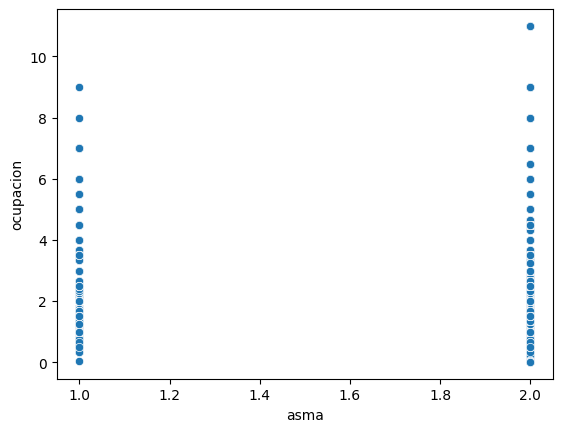

In [ ]:
# Crear la gráfica de barras con seaborn
sns.scatterplot(x='asma', y='ocupacion', data=df_asma)

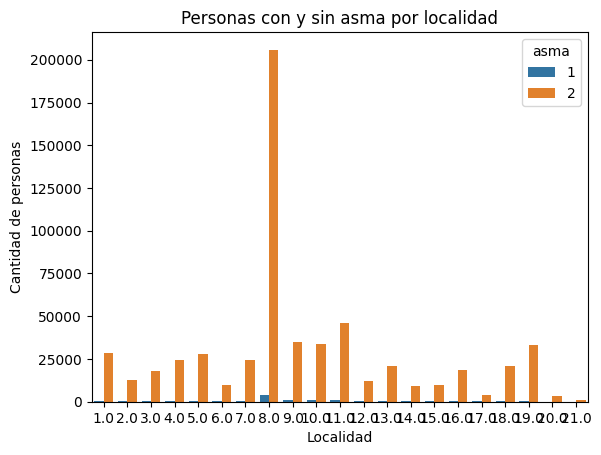

In [ ]:
sns.countplot(x='localidad', hue='asma', data=df_asma)
plt.title('Personas con y sin asma por localidad')
plt.xlabel('Localidad')
plt.ylabel('Cantidad de personas')
plt.show()

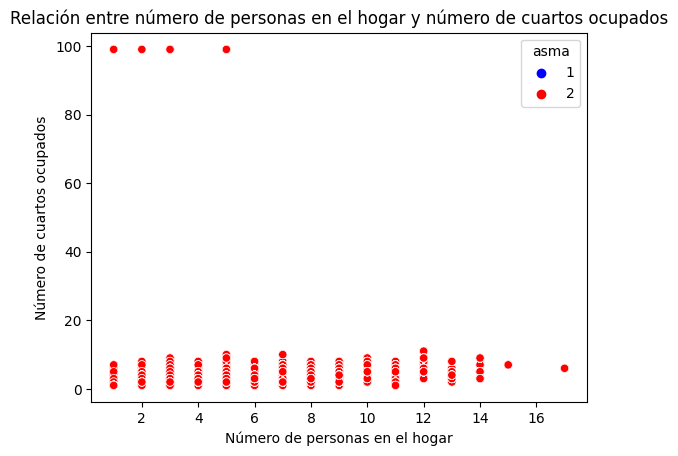

In [ ]:
sns.scatterplot(x='num_personas_hogar', y='num_cuartos_ocupados', hue='asma', data=df_asma, palette=['blue', 'red'])
plt.title('Relación entre número de personas en el hogar y número de cuartos ocupados')
plt.xlabel('Número de personas en el hogar')
plt.ylabel('Número de cuartos ocupados')
plt.show()

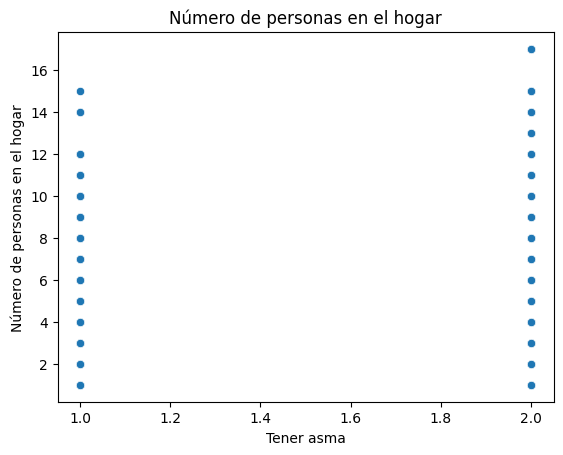

In [ ]:

sns.scatterplot(x='asma', y='num_personas_hogar', data=df_asma)
plt.title('Número de personas en el hogar')
plt.xlabel('Tener asma')
plt.ylabel('Número de personas en el hogar')
plt.show()

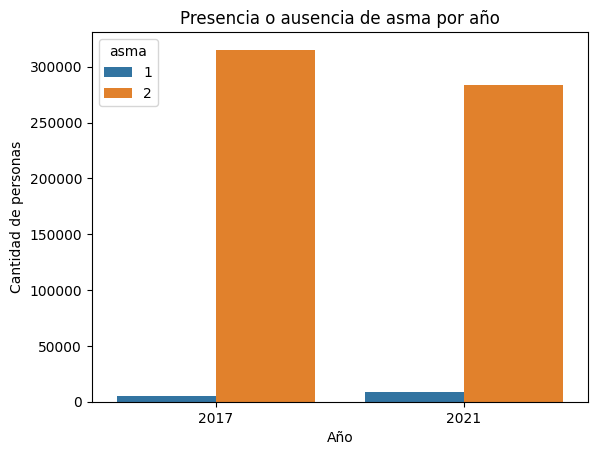

In [ ]:
df_counts = df_asma.groupby(['year', 'asma']).size().reset_index(name='count')
sns.barplot(x='year', y='count', hue='asma', data=df_counts)
plt.title('Presencia o ausencia de asma por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de personas')
plt.show()

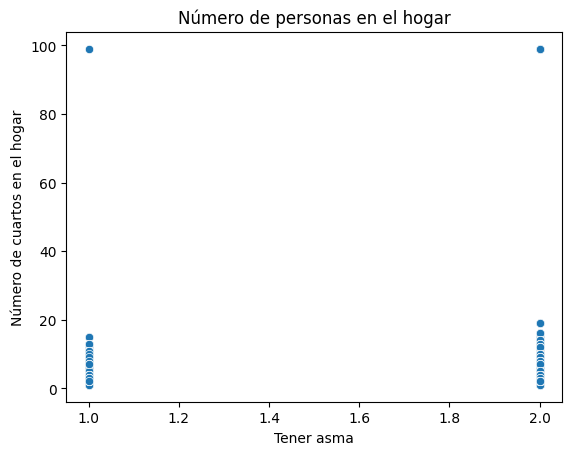

In [ ]:

sns.scatterplot(x='asma', y='num_cuartos_hogar', data=df_asma)
plt.title('Número de personas en el hogar')
plt.xlabel('Tener asma')
plt.ylabel('Número de cuartos en el hogar')
plt.show()

# ETL

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df_asma = pd.read_csv('./data/unificado_asma.csv', encoding="utf-8", sep = ',')

In [ ]:
df_asma.shape 

(612175, 12)

In [ ]:
df_asma.sample(10)

,id_vivienda,id_hogar,id_persona,num_personas_hogar,num_cuartos_hogar,num_cuartos_ocupados,num_cuartos,localidad,iluminacion_sala,iluminacion_cuartos,asma,year
192482,221389.0,2213891,22138913,3,2,1,1.0,19.0,1.0,1.0,2,2017
113622,160693.0,1606931,16069312,2,4,3,1.0,8.0,1.0,1.0,2,2017
342774,1013974.0,10139741,101397414,4,3,2,1.0,8.0,2.0,2.0,2,2021
390213,1046136.0,10461361,104613612,3,4,3,1.0,5.0,2.0,2.0,2,2021
575526,342111.0,3421111,34211113,4,3,2,1.0,7.0,2.0,2.0,2,2021
322076,1054562.0,10545621,105456213,4,5,3,2.0,1.0,2.0,2.0,1,2021
46082,129827.0,1298271,12982711,1,2,1,1.0,19.0,2.0,1.0,2,2017
388603,1044911.0,10449111,104491112,4,4,3,1.0,3.0,2.0,2.0,2,2021
420463,1102445.0,11024451,110244511,3,5,3,2.0,7.0,2.0,2.0,2,2021
477344,1156509.0,11565091,115650911,2,4,2,3.0,13.0,2.0,2.0,2,2021


In [ ]:
resultado = df_asma.loc[df_asma['id_vivienda'] == 101543.0]

print(resultado)

      id_vivienda  id_hogar  id_persona  num_personas_hogar   
27       101543.0   1015431    10154311                   7  \
28       101543.0   1015431    10154315                   7   
5870     101543.0   1015431    10154312                   7   
5871     101543.0   1015431    10154313                   7   
5872     101543.0   1015431    10154314                   7   
5873     101543.0   1015431    10154316                   7   
5874     101543.0   1015431    10154317                   7   

      num_cuartos_hogar  num_cuartos_ocupados  num_cuartos  localidad   
27                    2                     2          1.0       14.0  \
28                    2                     2          1.0       14.0   
5870                  2                     2          1.0       14.0   
5871                  2                     2          1.0       14.0   
5872                  2                     2          1.0       14.0   
5873                  2                     2          1.

In [ ]:
duplicados = df_asma.duplicated(subset=['id_vivienda'])
numero_duplicados = duplicados.sum()
print("El número de filas duplicadas es:", numero_duplicados)

El número de filas duplicadas es: 398516


In [ ]:
# Calcula el porcentaje
def calcular_porcentaje(row):
    if row['iluminacion_sala'] == 1 and row['iluminacion_cuartos'] == 1:
        return 100
    elif row['iluminacion_sala'] == 2 and row['iluminacion_cuartos'] == 2:
        return 0
    else:
        return 50

#129827.0

In [ ]:
df_asma['porcentaje_iluminacion'] = df_asma.apply(lambda x: calcular_porcentaje(x), axis=1)

In [ ]:
#indice de hacinamiento
df_asma['ocupacion'] = df_asma['num_personas_hogar'] / df_asma['num_cuartos_hogar']

In [ ]:
#Porcentaje de hacinamiento

count_by_vivienda = df_asma.groupby('id_vivienda')['asma'].apply(lambda x: (x == 1).sum())

# Imprimir el resultado
print(count_by_vivienda)



id_vivienda
101000.0     0
101001.0     0
101002.0     0
101003.0     0
101004.0     0
            ..
3006808.0    0
3006809.0    0
3006810.0    0
3006811.0    0
3006812.0    0
Name: asma, Length: 213659, dtype: int64


In [ ]:

df_asma['cantidad_asma'] = df_asma['id_vivienda'].map(count_by_vivienda)
print(df_asma)


        id_vivienda  id_hogar  id_persona  num_personas_hogar   
0          101033.0   1010331    10103311                   1  \
1          101041.0   1010411    10104112                   3   
2          101042.0   1010421    10104213                   5   
3          101047.0   1010471    10104713                   3   
4          101059.0   1010591    10105914                   5   
...             ...       ...         ...                 ...   
612170     999996.0   9999961    99999612                   2   
612171     999997.0   9999971    99999711                   1   
612172     999998.0   9999981    99999811                   2   
612173     999998.0   9999981    99999812                   2   
612174     999999.0   9999991    99999911                   1   

        num_cuartos_hogar  num_cuartos_ocupados  num_cuartos  localidad   
0                       4                     1          2.0       11.0  \
1                       1                     1          1.0        1

In [ ]:
df_asma.head(20)

,id_vivienda,id_hogar,id_persona,num_personas_hogar,num_cuartos_hogar,num_cuartos_ocupados,num_cuartos,localidad,iluminacion_sala,iluminacion_cuartos,asma,year,ocupacion,cantidad_asma,porcentaje_iluminacion
0,101033.0,1010331,10103311,1,4,1,2.0,11.0,1.0,1.0,1,2017,0.250000,1,100
1,101041.0,1010411,10104112,3,1,1,1.0,1.0,2.0,2.0,1,2017,3.000000,1,0
2,101042.0,1010421,10104213,5,4,3,1.0,1.0,1.0,1.0,1,2017,1.250000,1,100
3,101047.0,1010471,10104713,3,3,3,1.0,1.0,2.0,1.0,1,2017,1.000000,1,50
4,101059.0,1010591,10105914,5,4,4,2.0,11.0,1.0,1.0,1,2017,1.250000,2,100
5,101059.0,1010591,10105915,5,4,4,2.0,11.0,1.0,1.0,1,2017,1.250000,2,100
6,101063.0,1010631,10106311,3,5,3,1.0,11.0,1.0,1.0,1,2017,0.600000,1,100
7,101089.0,1010891,10108911,4,4,3,2.0,11.0,1.0,1.0,1,2017,1.000000,2,100
8,101089.0,1010891,10108914,4,4,3,2.0,11.0,1.0,1.0,1,2017,1.000000,2,100
9,101142.0,1011422,10114221,3,2,1,1.0,13.0,1.0,1.0,1,2017,1.500000,1,100


In [ ]:
df_asma['asma'] = df_asma['asma'].replace({1: 'si', 2: 'no'})

In [ ]:
replace_localidades = {1:'Usaquén', 2:'Chapinero', 3:'Santafé', 4:'San Cristó', 5:'Usme', 6:'Tunjuelito', 7:'Bosa',
                     8:'Kennedy', 9:'Fontibón', 10:'Engativá', 11:'Suba', 12:'Barrios Unidos', 13:'Teusaquillo', 14:'Los Mártires',
                     15:'Antonio Nariño', 16:'Puente Aranda',17:'La Candelaria', 18:'Rafael Uribe Uribe', 19:'Ciudad Bolívar',
                     20:'Sumapaz', 21:'Otra localidad rural'}

In [ ]:
df_asma['localidad'] = df_asma['localidad'].replace(replace_localidades)

In [ ]:
#Eliminamos la columna num_cuartos_ocupados
df_asma = df_asma.drop('num_cuartos_ocupados', axis=1)

In [ ]:
df_asma.head(10)

,id_vivienda,id_hogar,id_persona,num_personas_hogar,num_cuartos_hogar,num_cuartos,localidad,iluminacion_sala,iluminacion_cuartos,asma,year,ocupacion,cantidad_asma,porcentaje_iluminacion
0,101033.0,1010331,10103311,1,4,2.0,Suba,1.0,1.0,si,2017,0.25,1,100
1,101041.0,1010411,10104112,3,1,1.0,Usaquén,2.0,2.0,si,2017,3.00,1,0
2,101042.0,1010421,10104213,5,4,1.0,Usaquén,1.0,1.0,si,2017,1.25,1,100
3,101047.0,1010471,10104713,3,3,1.0,Usaquén,2.0,1.0,si,2017,1.00,1,50
4,101059.0,1010591,10105914,5,4,2.0,Suba,1.0,1.0,si,2017,1.25,2,100
5,101059.0,1010591,10105915,5,4,2.0,Suba,1.0,1.0,si,2017,1.25,2,100
6,101063.0,1010631,10106311,3,5,1.0,Suba,1.0,1.0,si,2017,0.60,1,100
7,101089.0,1010891,10108911,4,4,2.0,Suba,1.0,1.0,si,2017,1.00,2,100
8,101089.0,1010891,10108914,4,4,2.0,Suba,1.0,1.0,si,2017,1.00,2,100
9,101142.0,1011422,10114221,3,2,1.0,Teusaquillo,1.0,1.0,si,2017,1.50,1,100


In [ ]:
#Dimensión año
df_year = pd.DataFrame({'year': [2017, 2021]})
#agremamos una columna id_year
df_year['id_year'] = range(1, len(df_year) + 1)
df_year.head(10)

,year,id_year
0,2017,1
1,2021,2


In [ ]:
df_asma = pd.merge(df_asma, df_year[['year', 'id_year']], on='year', how='left')

In [ ]:
df_asma.sample(10)

,id_vivienda,id_hogar,id_persona,num_personas_hogar,num_cuartos_hogar,num_cuartos,localidad,iluminacion_sala,iluminacion_cuartos,asma,year,ocupacion,cantidad_asma,porcentaje_iluminacion,id_year
289649,280695.0,2806951,28069511,1,4,3.0,Usaquén,1.0,1.0,no,2017,0.250000,0,100,1
290782,281230.0,2812301,28123012,2,2,1.0,Rafael Uribe Uribe,1.0,1.0,no,2017,1.000000,0,100,1
24314,111147.0,1111471,11114711,3,2,1.0,Usme,1.0,1.0,no,2017,1.500000,0,100,1
351951,1023962.0,10239621,102396212,2,3,1.0,Suba,2.0,2.0,no,2021,0.666667,0,0,2
511492,1911341.0,19113411,191134111,3,4,2.0,Teusaquillo,2.0,2.0,no,2021,0.750000,0,0,2
107340,158422.0,1584221,15842211,1,3,1.0,Kennedy,1.0,1.0,no,2017,0.333333,0,100,1
160660,181192.0,1811921,18119212,2,2,1.0,Kennedy,2.0,1.0,no,2017,1.000000,0,50,1
548698,329195.0,3291951,32919514,5,2,1.0,San Cristó,2.0,2.0,no,2021,2.500000,1,0,2
127935,166490.0,1664901,16649012,3,5,1.0,Kennedy,1.0,1.0,no,2017,0.600000,0,100,1
336490,1004024.0,10040241,100402411,4,2,1.0,Usme,2.0,2.0,no,2021,2.000000,0,0,2


In [ ]:
#Dimensión asma

df_asma_ = pd.DataFrame({'asma': ['si', 'no']})
df_asma_['id_asma'] = range(1, len(df_asma_) + 1)
df_asma_.head(10)

,asma,id_asma
0,si,1
1,no,2


In [ ]:
df_asma = pd.merge(df_asma, df_asma_[['asma', 'id_asma']], on='asma', how='left')

In [ ]:
df_asma.sample(20)

,id_vivienda,id_hogar,id_persona,num_personas_hogar,num_cuartos_hogar,num_cuartos,localidad,iluminacion_sala,iluminacion_cuartos,asma,year,ocupacion,cantidad_asma,porcentaje_iluminacion,id_year,id_asma
133883,169020.0,1690201,16902011,4,3,1.0,Ciudad Bolívar,1.0,1.0,no,2017,1.333333,0,100,1,2
588158,565362.0,5653621,56536213,4,4,1.0,Kennedy,2.0,2.0,no,2021,1.000000,0,0,2,2
271871,266623.0,2666231,26662311,2,3,1.0,Fontibón,1.0,1.0,no,2017,0.666667,0,100,1,2
379772,1040189.0,10401891,104018911,3,4,2.0,Fontibón,2.0,2.0,no,2021,0.750000,0,0,2,2
528191,3002731.0,30027311,300273111,3,5,2.0,Suba,2.0,2.0,no,2021,0.600000,0,0,2,2
200336,225199.0,2251991,22519914,4,6,3.0,Teusaquillo,1.0,1.0,no,2017,0.666667,0,100,1,2
194114,222077.0,2220771,22207711,3,4,2.0,Fontibón,1.0,1.0,no,2017,0.750000,0,100,1,2
301384,290821.0,2908211,29082112,4,6,2.0,Puente Aranda,1.0,1.0,no,2017,0.666667,0,100,1,2
433215,1109242.0,11092421,110924211,2,4,1.0,Ciudad Bolívar,2.0,2.0,no,2021,0.500000,0,0,2,2
232022,240201.0,2402011,24020111,2,3,1.0,Santafé,1.0,1.0,no,2017,0.666667,0,100,1,2


In [ ]:
localidades = ['Usaquén', 'Chapinero', 'Santafé', 'San Cristó', 'Usme', 'Tunjuelito', 'Bosa', 'Kennedy', 'Fontibón', 'Engativá', 'Suba', 'Barrios Unidos', 'Teusaquillo', 'Los Mártires', 'Antonio Nariño', 'Puente Aranda', 'La Candelaria', 'Rafael Uribe Uribe', 'Ciudad Bolívar', 'Sumapaz', 'Otra localidad rural']

df_localidad = pd.DataFrame({'localidad': localidades})

df_localidad['id_localidad'] = range(1, len(df_localidad) + 1)
df_localidad.head(11)


,localidad,id_localidad
0,Usaquén,1
1,Chapinero,2
2,Santafé,3
3,San Cristó,4
4,Usme,5
5,Tunjuelito,6
6,Bosa,7
7,Kennedy,8
8,Fontibón,9
9,Engativá,10


In [ ]:
df_asma = pd.merge(df_asma, df_localidad[['localidad', 'id_localidad']], on='localidad', how='left')

In [ ]:
df_asma.sample(20)

,id_vivienda,id_hogar,id_persona,num_personas_hogar,num_cuartos_hogar,num_cuartos,localidad,iluminacion_sala,iluminacion_cuartos,asma,year,ocupacion,cantidad_asma,porcentaje_iluminacion,id_year,id_asma,id_localidad
21313,109452.0,1094521,10945212,2,4,3.0,Kennedy,1.0,1.0,no,2017,0.500000,0,100,1,2,8
346466,1016906.0,10169061,101690615,5,4,1.0,Rafael Uribe Uribe,2.0,2.0,no,2021,1.250000,0,0,2,2,18
184551,195095.0,1950951,19509515,5,3,3.0,Kennedy,1.0,1.0,no,2017,1.666667,0,100,1,2,8
496499,1165963.0,11659631,116596311,5,4,1.0,Rafael Uribe Uribe,2.0,2.0,no,2021,1.250000,0,0,2,2,18
567473,338301.0,3383011,33830111,3,3,1.0,Ciudad Bolívar,2.0,2.0,no,2021,1.000000,2,0,2,2,19
233721,240998.0,2409981,24099811,4,2,1.0,Kennedy,1.0,1.0,no,2017,2.000000,0,100,1,2,8
114928,161123.0,1611231,16112313,4,5,1.0,Kennedy,1.0,1.0,no,2017,0.800000,0,100,1,2,8
218402,233477.0,2334771,23347713,4,3,1.0,Usme,1.0,1.0,no,2017,1.333333,0,100,1,2,5
499625,1457132.0,14571321,145713213,6,6,2.0,Ciudad Bolívar,2.0,2.0,no,2021,1.000000,0,0,2,2,19
386161,1043813.0,10438131,104381314,4,4,2.0,Kennedy,2.0,2.0,no,2021,1.000000,0,0,2,2,8


In [ ]:
# Obtener una lista de los IDs de las viviendas sin repeticiones
ids_viviendas = df_asma['id_vivienda'].unique()

# Crear un nuevo dataset solo con la columna de los IDs de las viviendas
df_viviendas = pd.DataFrame({'id_vivienda': ids_viviendas})
df_viviendas['id_casa'] = range(1, len(df_viviendas) + 1)
df_viviendas.head(10)


,id_vivienda,id_casa
0,101033.0,1
1,101041.0,2
2,101042.0,3
3,101047.0,4
4,101059.0,5
5,101063.0,6
6,101089.0,7
7,101142.0,8
8,101158.0,9
9,101189.0,10


In [ ]:
df_asma = pd.merge(df_asma, df_viviendas[['id_vivienda', 'id_casa']], on='id_vivienda', how='left')

In [ ]:
df_asma.head(20)

,id_vivienda,id_hogar,id_persona,num_personas_hogar,num_cuartos_hogar,num_cuartos,localidad,iluminacion_sala,iluminacion_cuartos,asma,year,ocupacion,cantidad_asma,porcentaje_iluminacion,id_year,id_asma,id_localidad,id_casa
0,101033.0,1010331,10103311,1,4,2.0,Suba,1.0,1.0,si,2017,0.250000,1,100,1,1,11,1
1,101041.0,1010411,10104112,3,1,1.0,Usaquén,2.0,2.0,si,2017,3.000000,1,0,1,1,1,2
2,101042.0,1010421,10104213,5,4,1.0,Usaquén,1.0,1.0,si,2017,1.250000,1,100,1,1,1,3
3,101047.0,1010471,10104713,3,3,1.0,Usaquén,2.0,1.0,si,2017,1.000000,1,50,1,1,1,4
4,101059.0,1010591,10105914,5,4,2.0,Suba,1.0,1.0,si,2017,1.250000,2,100,1,1,11,5
5,101059.0,1010591,10105915,5,4,2.0,Suba,1.0,1.0,si,2017,1.250000,2,100,1,1,11,5
6,101063.0,1010631,10106311,3,5,1.0,Suba,1.0,1.0,si,2017,0.600000,1,100,1,1,11,6
7,101089.0,1010891,10108911,4,4,2.0,Suba,1.0,1.0,si,2017,1.000000,2,100,1,1,11,7
8,101089.0,1010891,10108914,4,4,2.0,Suba,1.0,1.0,si,2017,1.000000,2,100,1,1,11,7
9,101142.0,1011422,10114221,3,2,1.0,Teusaquillo,1.0,1.0,si,2017,1.500000,1,100,1,1,13,8


In [ ]:
df_asma.columns

Index(['id_vivienda', 'id_hogar', 'id_persona', 'num_personas_hogar',
       'num_cuartos_hogar', 'num_cuartos', 'localidad', 'iluminacion_sala',
       'iluminacion_cuartos', 'asma', 'year', 'ocupacion', 'cantidad_asma',
       'porcentaje_iluminacion', 'id_year', 'id_asma', 'id_localidad',
       'id_casa'],
      dtype='object')

In [ ]:
lista_columns_delete = ['id_vivienda', 'id_hogar', 'id_persona',
                        'num_cuartos', 'localidad', 'iluminacion_sala',
                        'iluminacion_cuartos', 'asma','year']

In [ ]:
#Eliminamos la columna num_cuartos_ocupados
for value in lista_columns_delete:
  df_asma = df_asma.drop(value, axis=1)
  print(value)

id_vivienda
id_hogar
id_persona
num_cuartos
localidad
iluminacion_sala
iluminacion_cuartos
asma
year


In [ ]:
df_asma.head(20)

,num_personas_hogar,num_cuartos_hogar,ocupacion,cantidad_asma,porcentaje_iluminacion,id_year,id_asma,id_localidad,id_casa
0,1,4,0.250000,1,100,1,1,11,1
1,3,1,3.000000,1,0,1,1,1,2
2,5,4,1.250000,1,100,1,1,1,3
3,3,3,1.000000,1,50,1,1,1,4
4,5,4,1.250000,2,100,1,1,11,5
5,5,4,1.250000,2,100,1,1,11,5
6,3,5,0.600000,1,100,1,1,11,6
7,4,4,1.000000,2,100,1,1,11,7
8,4,4,1.000000,2,100,1,1,11,7
9,3,2,1.500000,1,100,1,1,13,8


In [ ]:
df_asma['ocupacion'].min(), df_asma['ocupacion'].max(), df_asma['ocupacion'].mean(),  df_asma['ocupacion'].mode(),

(0.010101010101010102,
 11.0,
 1.0911968028901085,
 0    1.0
 Name: ocupacion, dtype: float64)

In [ ]:
df_asma.to_csv('./data/datos_tratados/hacinamiento_fact.csv', index=True)

In [ ]:
df_year.to_csv('./data/datos_tratados/year_dim.csv', index=True)

In [ ]:
df_asma_.to_csv('./data/datos_tratados/asma_dim.csv', index=True)

In [ ]:
df_localidad.to_csv('./data/datos_tratados/localidad_dim.csv', index=True)

In [ ]:
df_viviendas.to_csv('./data/datos_tratados/vivienda_dim.csv', index=True)

# Correción tabla de hechos

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df_asma = pd.read_csv('./data/datos_tratados/hacinamiento_fact.csv', encoding="utf-8", sep = ',')

In [ ]:
df_asma.shape 

(612175, 10)

In [ ]:
df_asma.head(10) 

,Unnamed: 0,num_personas_hogar,num_cuartos_hogar,ocupacion,cantidad_asma,porcentaje_iluminacion,id_year,id_asma,id_localidad,id_casa
0,0,1,4,0.25,1,100,1,1,11,1
1,1,3,1,3.00,1,0,1,1,1,2
2,2,5,4,1.25,1,100,1,1,1,3
3,3,3,3,1.00,1,50,1,1,1,4
4,4,5,4,1.25,2,100,1,1,11,5
5,5,5,4,1.25,2,100,1,1,11,5
6,6,3,5,0.60,1,100,1,1,11,6
7,7,4,4,1.00,2,100,1,1,11,7
8,8,4,4,1.00,2,100,1,1,11,7
9,9,3,2,1.50,1,100,1,1,13,8


In [ ]:
df_asma = df_asma.drop_duplicates(subset=['id_casa'])


In [14]:
df_asma.shape 

(213659, 10)

In [13]:
df_asma.head(10) 

,Unnamed: 0,num_personas_hogar,num_cuartos_hogar,ocupacion,cantidad_asma,porcentaje_iluminacion,id_year,id_asma,id_localidad,id_casa
0,0,1,4,0.25,1,100,1,1,11,1
1,1,3,1,3.00,1,0,1,1,1,2
2,2,5,4,1.25,1,100,1,1,1,3
3,3,3,3,1.00,1,50,1,1,1,4
4,4,5,4,1.25,2,100,1,1,11,5
6,6,3,5,0.60,1,100,1,1,11,6
7,7,4,4,1.00,2,100,1,1,11,7
9,9,3,2,1.50,1,100,1,1,13,8
10,10,2,1,2.00,1,0,1,1,10,9
11,11,6,4,1.50,1,100,1,1,4,10


In [15]:
df_asma.to_csv('./data/datos_tratados/hacinamiento_fact_actualizada.csv', index=False)